In [3]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from skimage import io, color
from scipy.signal import convolve2d

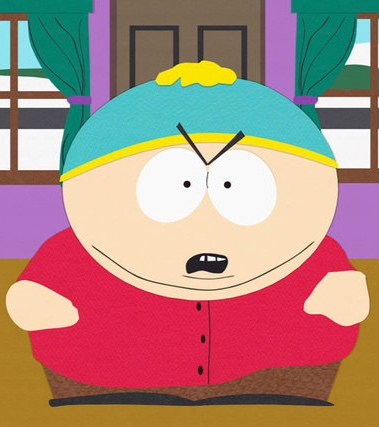

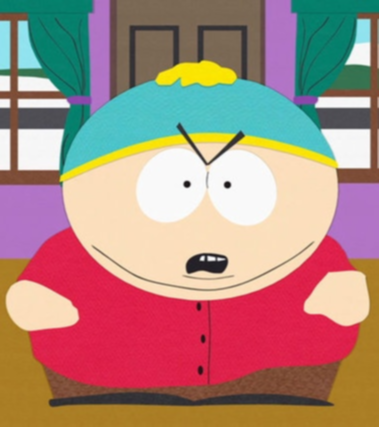

In [13]:
# Rozmycie
def gaussian_blur(image):
    # Tworzenie jądra Gaussowskiego
    kernel = np.array([[1, 2, 1],
                       [2, 4, 2],
                       [1, 2, 1]]) / 16.0

    # Rozmycie obrazu za pomocą konwolucji
    blurred_image = cv2.filter2D(image, -1, kernel)

    return blurred_image

# Wczytaj przykładowy obraz (zmień ścieżkę do pliku)
image_path = "/content/eric.jpg"
original_image = cv2.imread(image_path)

blurred_image = gaussian_blur(original_image)

cv2_imshow(original_image)
cv2_imshow(blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


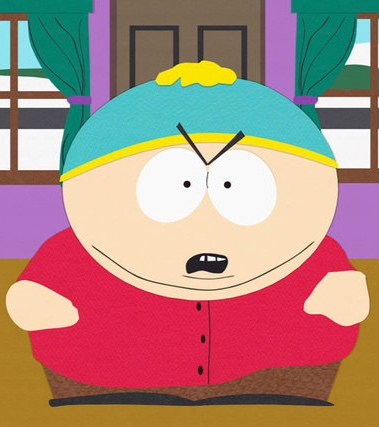

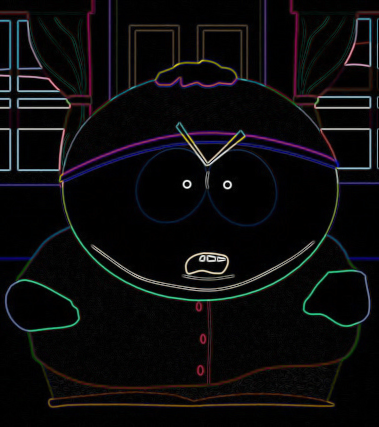

In [12]:
# Wykrywanie krawędzi
def detect_edges_sobel_custom(image_path):
    # Wczytaj obraz
    original_image = cv2.imread(image_path)

    # Macierze operatorów Sobela dla osi X i Y
    sx_kernel = np.array([[1, 0, -1],
                          [2, 0, -2],
                          [1, 0, -1]])

    sy_kernel = np.array([[1, 2, 1],
                          [0, 0, 0],
                          [-1, -2, -1]])

    # Zastosuj operatory Sobela w osi X i Y
    sobel_x = cv2.filter2D(original_image, cv2.CV_64F, sx_kernel)
    sobel_y = cv2.filter2D(original_image, cv2.CV_64F, sy_kernel)

    # Kombinuj wyniki obu operatorów
    edges_sobel = np.sqrt(sobel_x**2 + sobel_y**2)

    # Normalizuj wartości pikseli do zakresu 0-255
    edges_sobel = cv2.normalize(edges_sobel, None, 0, 255, cv2.NORM_MINMAX)

    # Konwertuj na typ uint8
    edges_sobel = np.uint8(edges_sobel)

    # Wyświetl oryginalny obraz i wykryte krawędzie
    cv2_imshow(original_image)
    cv2_imshow(edges_sobel)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Przykład użycia
image_path = '/content/eric.jpg'
detect_edges_sobel_custom(image_path)


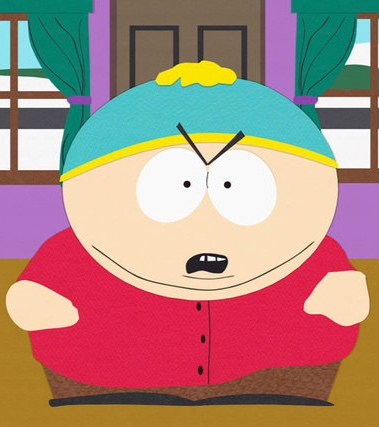

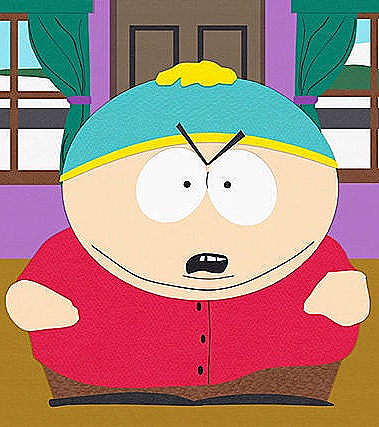

In [11]:
# Wyostrzanie
def wyostrzanie_obrazu(image_path):
    # Wczytaj obraz
    image = cv2.imread(image_path)

    # Jądro do wyostrzania
    kernel = np.array([
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ])

    # Zastosuj konwolucję z jądrem
    sharpened_image = cv2.filter2D(image, -1, kernel)

    # Wyświetl obrazy
    cv2_imshow(image)
    cv2_imshow(sharpened_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Podaj ścieżkę do swojego obrazu
obraz_path = '/content/eric.jpg'
wyostrzanie_obrazu(obraz_path)


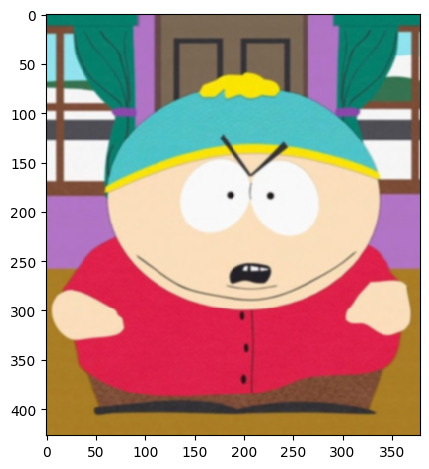

In [18]:
# Rozymcie jądrerm 5 na 5
def gaussian_kernel(size, sigma=1.0):
    """
    Generuje jądro Gaussowskie o podanym rozmiarze i odchyleniu standardowym.
    """
    kernel = np.fromfunction(
        lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-size//2)**2 + (y-size//2)**2)/(2*sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

def apply_gaussian_blur_color(image, kernel):
    """
    Stosuje rozmycie Gaussowskie na obrazie kolorowym za pomocą konwolucji na każdej warstwie.
    """
    result_image = np.zeros_like(image, dtype=np.float64)

    for channel in range(image.shape[2]):
        result_image[:, :, channel] = convolve2d(image[:, :, channel], kernel, mode='same', boundary='symm')

    return result_image.astype(np.uint8)

# Wczytaj przykładowy obraz (zmień ścieżkę do pliku)
image_path = "/content/eric.jpg"
image = io.imread(image_path)

# Parametry rozmycia Gaussowskiego
kernel_size = 5
sigma = 1.0

# Wygeneruj jądro Gaussowskie
gaussian_kernel_matrix = gaussian_kernel(kernel_size, sigma)

# Zastosuj rozmycie Gaussowskie do obrazu kolorowego
blurred_image = apply_gaussian_blur_color(image, gaussian_kernel_matrix)
_ = io.imshow(blurred_image)